# Polynomial Prediction
 
 Given a polynomial $2x^3 - x^2 + x - 5$, plot the function with Gaussian noise. Use Chi-Squared, MLE, and TensorFlow to predict the polynomial equation and integration to assess accuracy
 

## Graphing Polynomial

A graph of the function $2x^3 - x^2 + x - 5$ where $\sigma = 0$. The base plot is given here to compare to later estimates. 

True area under curve: -10.666666666666666


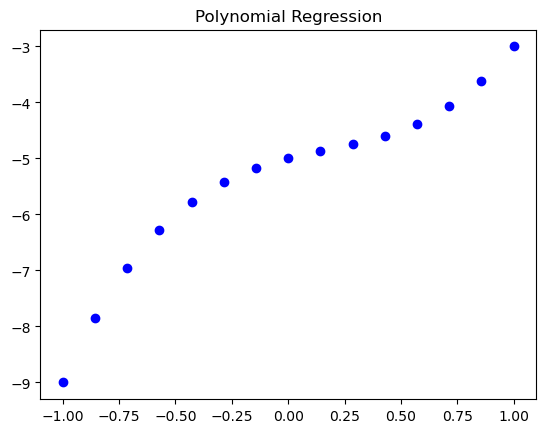

In [1]:
from polynomial_integrator import PolynomialIntegrator

import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 2*(x**3) - (x**2) + x - 5

x_values = np.linspace(start = -1, stop = 1, num = 15)

y_pred = f(x_values) # exact based on the polynomial

plt.scatter(x_values, y_pred, color = 'blue')
plt.title("Polynomial Regression")

integrator = PolynomialIntegrator([2, -1, 1, -5])
true_area = integrator.integrate_polynomial(-1, 1)[0]
print(f"True area under curve: {true_area}")



## Chi Squared Regression

Using the Chi - Squared method to find the best-fitting polynomial after generating Gaussian noise, with $\sigma$ varying between $0.1, 0.3, 0.5, 0.7,$ and $0.9$

Best-fit parameters (Chi-Squared Minimization): [ 1.89080876 -0.99251975  1.04590234 -5.00871361]
Area under the curve (sigma = 0.1). Area: -10.679107052041958. Error: 1.1856190531613863e-13


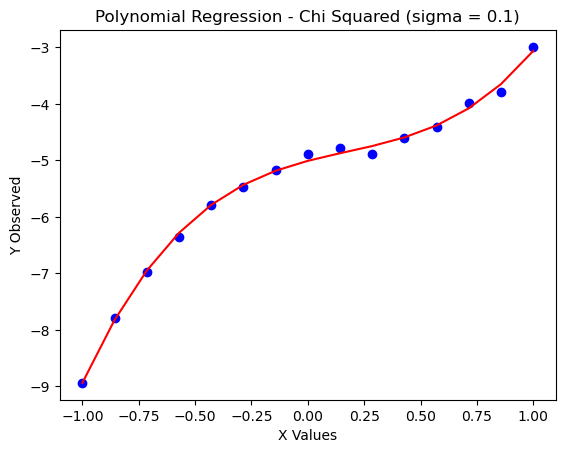

Best-fit parameters (Chi-Squared Minimization): [ 2.27293751 -0.98126821  0.66449159 -5.12007262]
Area under the curve (sigma = 0.3). Area: -10.89432404228209. Error: 1.2095129389468983e-13


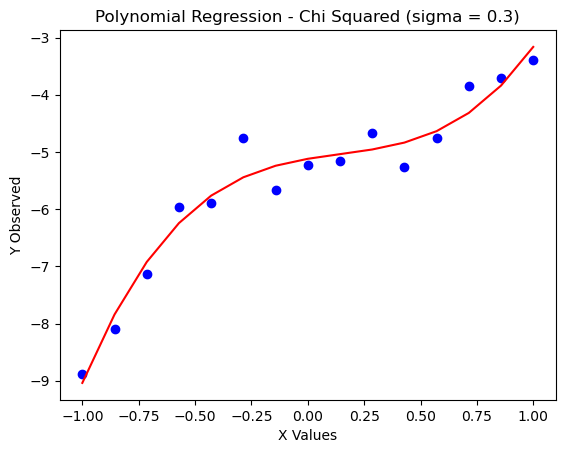

Best-fit parameters (Chi-Squared Minimization): [ 1.65555383e+00 -9.68596814e-04  1.51327025e+00 -5.55418098e+00]
Area under the curve (sigma = 0.5). Area: -11.109007692269595. Error: 1.233347612069568e-13


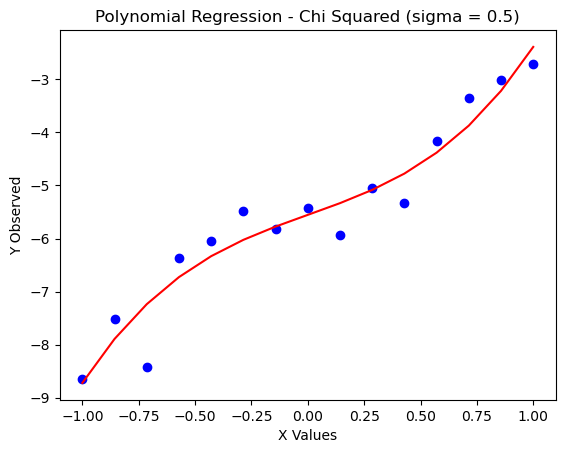

Best-fit parameters (Chi-Squared Minimization): [ 1.92437133 -1.59462678  0.6133935  -4.54677854]
Area under the curve (sigma = 0.7). Area: -10.156641601372282. Error: 1.1276137358709229e-13


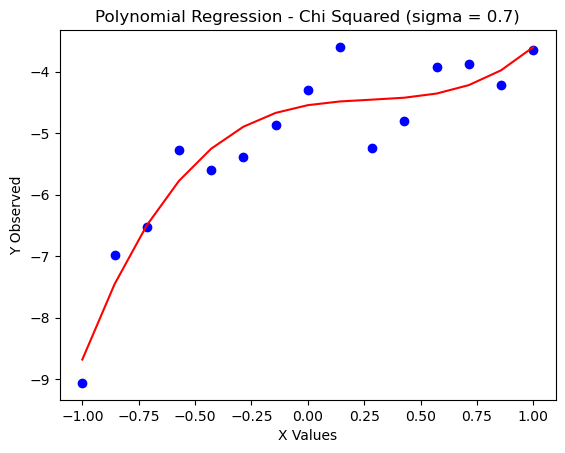

Best-fit parameters (Chi-Squared Minimization): [ 2.06996911 -0.40561976  0.74328107 -5.14757555]
Area under the curve (sigma = 0.9). Area: -10.565564285288602. Error: 1.173013273768464e-13


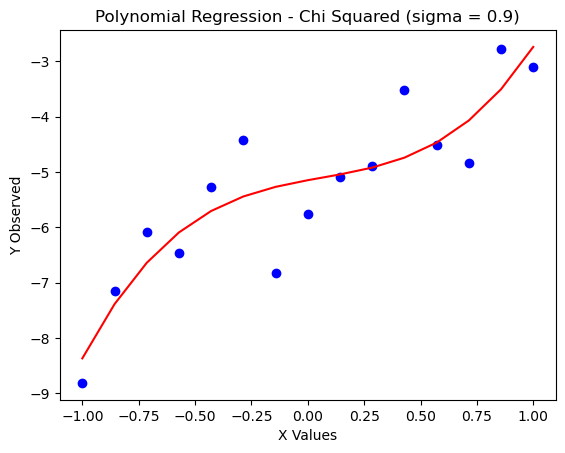

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_chi_squared import PolynomialRegressionChiSquared
from polynomial_integrator import PolynomialIntegrator

# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2

chi_sq_area = np.zeros(5)


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    
    # Create a PolynomialRegressionChiSquared object
    chi_sq = PolynomialRegressionChiSquared(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(chi_sq.x_values, chi_sq.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - Chi Squared (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # Minimize the chi-squared
    try:
        coeffs = chi_sq.minimize_chi_square()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing chi square for sigma = {sigma}: {e}")
    
    if coeffs is not None:
        # Integration using Simpson's Rule
        integrator = PolynomialIntegrator(coeffs)
        area, error = integrator.integrate_polynomial(lower_bound=-1, upper_bound=1)
        chi_sq_area[i] = area
        print(f"Area under the curve (sigma = {chi_sq.sigma:.1f}). Area: {area}. Error: {error}")
    else:
        print(f"Skipping integration for sigma = {sigma} due to error in minimizing chi-square.")

    plt.plot(chi_sq.x_values, np.polyval(coeffs, chi_sq.x_values), color='red')
        # Show the plot inline
    plt.show()

## MLE 

Using the Maximum Likelihood Estimation method to find the best-fitting polynomial after generating Gaussian noise, with $\sigma$ varying between $0.1, 0.3, 0.5, 0.7,$ and $0.9$

Best-fit parameters (MLE): [ 1.89455179 -1.01298064  1.09426619 -5.00842088]
Area under the curve (sigma = 0.1). Area: -10.692162179012493. Error: 1.1870684634165955e-13


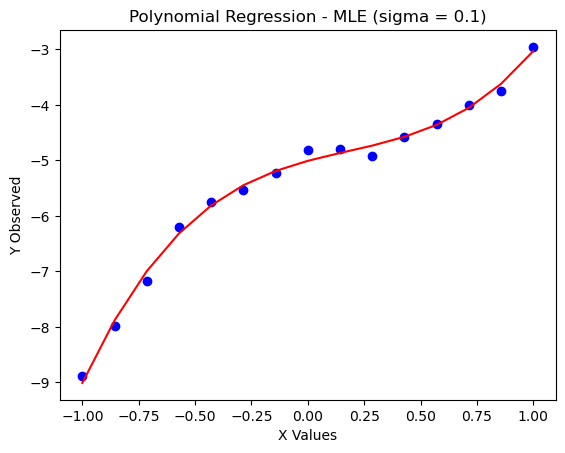

Best-fit parameters (MLE): [ 1.90053939 -0.84209546  0.97635821 -5.03388664]
Area under the curve (sigma = 0.3). Area: -10.629170260772877. Error: 1.1800749556171029e-13


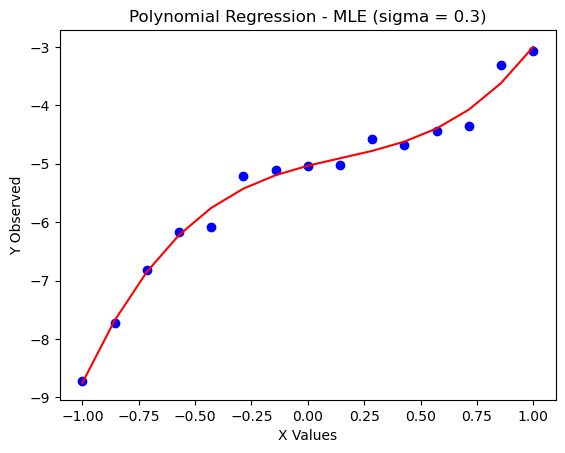

Best-fit parameters (MLE): [ 1.02335908 -0.82977234  1.62452957 -5.18382711]
Area under the curve (sigma = 0.5). Area: -10.92083578358178. Error: 1.2124563335082804e-13


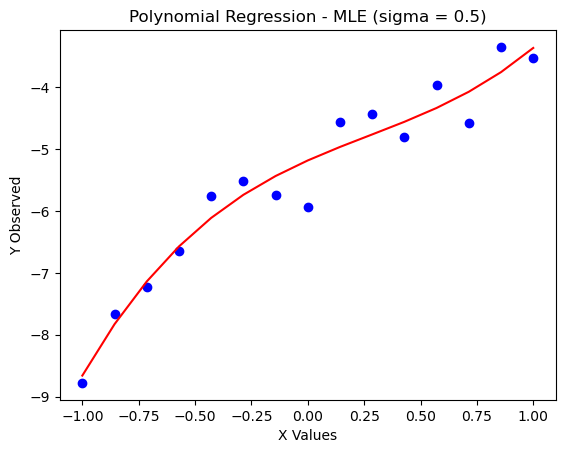

Best-fit parameters (MLE): [ 1.95222163 -0.89633319  1.42455273 -5.26993487]
Area under the curve (sigma = 0.7). Area: -11.137425193111737. Error: 1.236502588443293e-13


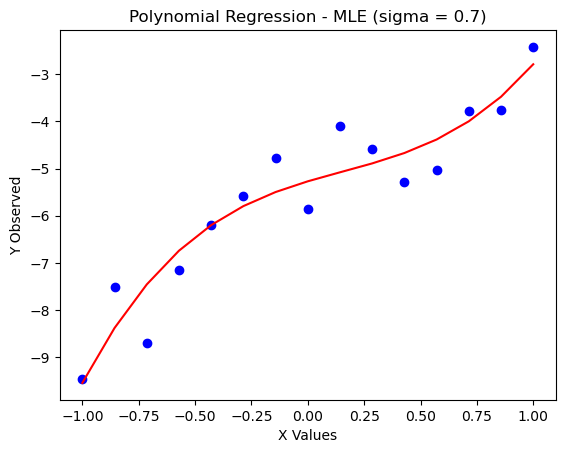

Best-fit parameters (MLE): [ 3.74614492  0.03414458 -0.78688527 -5.60793629]
Area under the curve (sigma = 0.9). Area: -11.193109523883127. Error: 1.242684791056617e-13


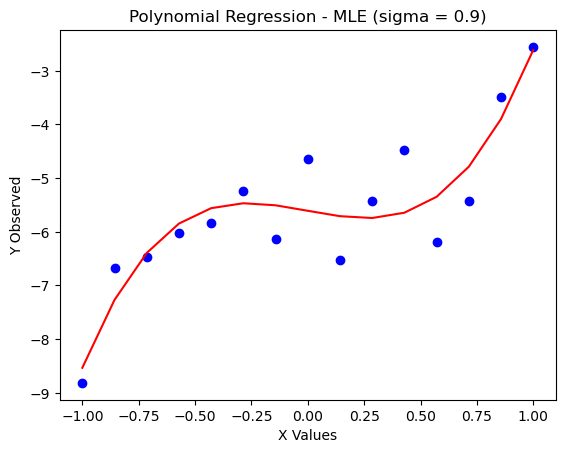

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_mle import PolynomialRegressionMLE
from polynomial_integrator import PolynomialIntegrator

## arrays to hold area
mle_area = np.zeros(5)

# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    

    mle = PolynomialRegressionMLE(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(mle.x_values, mle.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - MLE (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # minimize MLe
    try:
        coeffs = mle.minimize_mle()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing negative log likelihood for sigma = {sigma}: {e}")
    
    if coeffs is not None:
        # Integration using Simpson's Rule
        integrator = PolynomialIntegrator(coeffs)
        area, error = integrator.integrate_polynomial(lower_bound=-1, upper_bound=1)
        mle_area[i] = area
        print(f"Area under the curve (sigma = {mle.sigma:.1f}). Area: {area}. Error: {error}")
    else:
        print(f"Skipping integration for sigma = {mle.sigma} due to error in MLE.")
        
    plt.plot(mle.x_values, np.polyval(coeffs, mle.x_values), color='red')
    # Show the plot inline
    plt.show()

## TensorFlow

Using TensorFlow to predict the equation of the polynomial when data is generated with Gaussion noise  $\sigma$ varying between $0.1, 0.3, 0.5, 0.7,$ and $0.9$



------------------SIMGA = 0.1------------------
Epoch 0, Loss: 12.650151252746582
Epoch 100, Loss: 0.005704335868358612
Epoch 200, Loss: 0.011479897424578667
Epoch 300, Loss: 0.019349360838532448
Learned parameters appended to learned_params.txt


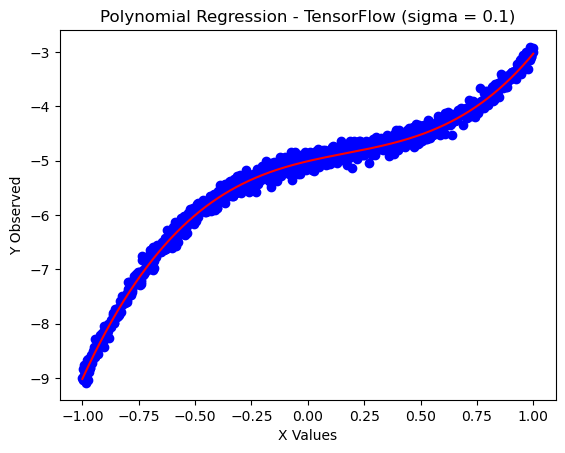

Learned Coefficients: [2.014345, -1.0137683, 0.9768726, -5.0107584]
Equation: 2.014x^3 + -1.014x^2 + 0.977x + -5.011
Area under the curve (sigma = 0.1). Area: -10.697362343470257. Error: 1.18764579764788e-13

------------------SIMGA = 0.3------------------
Epoch 0, Loss: 14.190052032470703
Epoch 100, Loss: 0.07261444628238678
Epoch 200, Loss: 0.09440530091524124
Epoch 300, Loss: 0.03698992356657982
Learned parameters appended to learned_params.txt


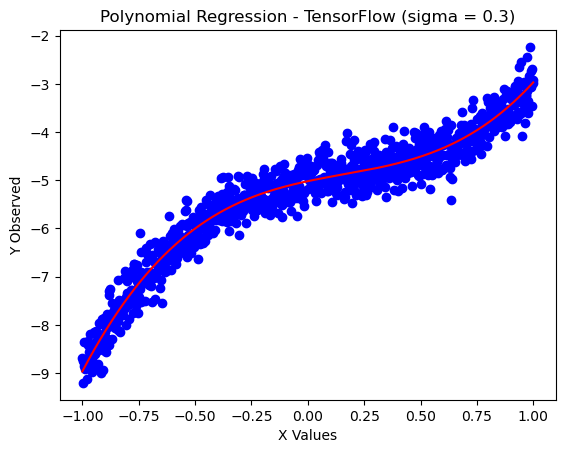

Learned Coefficients: [2.0070183, -0.94884604, 0.99030113, -5.0188055]
Equation: 2.007x^3 + -0.949x^2 + 0.990x + -5.019
Area under the curve (sigma = 0.3). Area: -10.670175035794577. Error: 1.1846274001519694e-13

------------------SIMGA = 0.5------------------
Epoch 0, Loss: 32.28520965576172
Epoch 100, Loss: 0.2902851700782776
Epoch 200, Loss: 0.17316100001335144
Epoch 300, Loss: 0.16642159223556519
Learned parameters appended to learned_params.txt


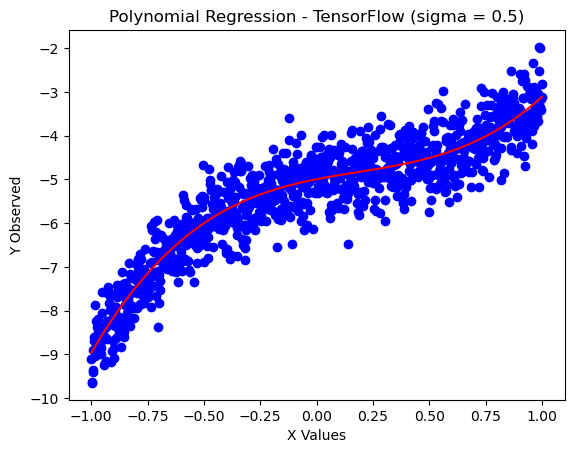

Learned Coefficients: [1.9123619, -1.0418254, 1.0166198, -4.996971]
Equation: 1.912x^3 + -1.042x^2 + 1.017x + -4.997
Area under the curve (sigma = 0.5). Area: -10.6884925365448. Error: 1.186661051260618e-13

------------------SIMGA = 0.7------------------
Epoch 0, Loss: 41.469669342041016
Epoch 100, Loss: 0.2880265712738037
Epoch 200, Loss: 0.6317787766456604
Epoch 300, Loss: 0.5972576141357422
Learned parameters appended to learned_params.txt


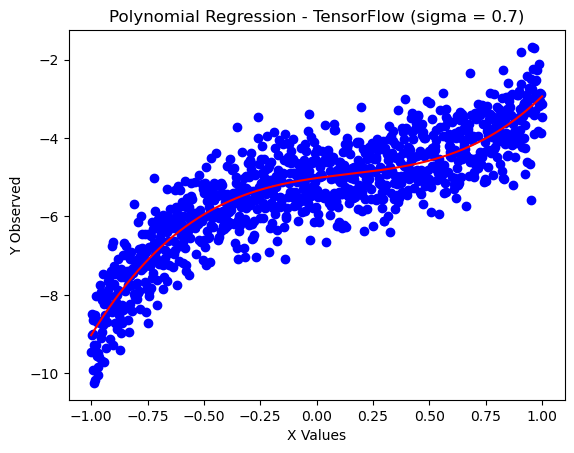

Learned Coefficients: [2.2310126, -0.96093565, 0.814699, -5.021936]
Equation: 2.231x^3 + -0.961x^2 + 0.815x + -5.022
Area under the curve (sigma = 0.7). Area: -10.68449564774831. Error: 1.186217307463745e-13

------------------SIMGA = 0.9------------------
Epoch 0, Loss: 35.32910919189453
Epoch 100, Loss: 1.1487984657287598
Epoch 200, Loss: 0.7360866069793701
Epoch 300, Loss: 1.0533061027526855
Learned parameters appended to learned_params.txt


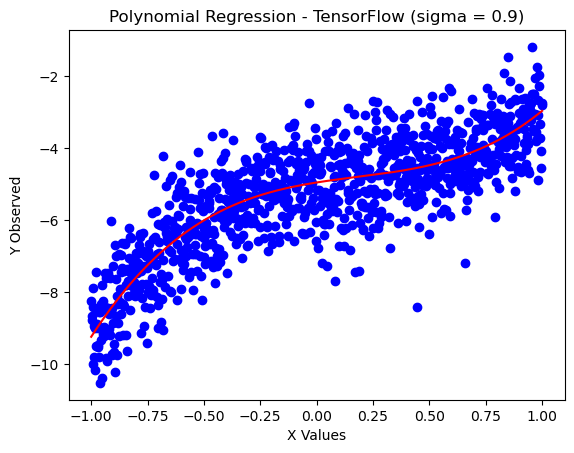

Learned Coefficients: [2.1428266, -1.1488537, 0.9957634, -4.957319]
Equation: 2.143x^3 + -1.149x^2 + 0.996x + -4.957
Area under the curve (sigma = 0.9). Area: -10.680540005366007. Error: 1.1857781429387433e-13


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_tf import CubicPolynomialModel
from polynomial_integrator import PolynomialIntegrator  

# Arrays to hold areas
tf_area = np.zeros(5)

# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2

# File to log all training results
log_file = "training_log.txt"

# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):   
    print()
    print(f"------------------SIMGA = {sigma:.1f}------------------")
    

    try:
        # Instantiate the model with the current sigma
        model = CubicPolynomialModel(num_points=1000, sigma=sigma, learning_rate=0.01, batch_size=32)
        
        # Log the start of training for this sigma value
        with open(log_file, 'a') as file:
            file.write(f"\nTraining started for sigma = {sigma:.1f} at {model.get_timestamp()}\n")
            file.write("Epoch\tLoss\n")
        
        # Train the model and log the progress in the same file
        model.train(n_epochs=400, log_file=log_file)
        
        # Save the learned parameters to a file
        model.save_learned_parameters(param_file="learned_params.txt")
        
        # Get the model coefficients
        coeffs = [model.a.numpy(), model.b.numpy(), model.c.numpy(), model.d.numpy()]
        
        ## PRINTING VALUES AND DISPLAYING GRAPHS
        

        # Plot the observed data
        plt.figure()  # Create a new figure
        
        plt.title(f"Polynomial Regression - TensorFlow (sigma = {sigma:.1f})")
        plt.xlabel('X Values')
        plt.ylabel('Y Observed')

        plt.scatter(model.x_values, model.y_values, color = "blue")
        plt.plot(model.x_values, np.polyval(coeffs, model.x_values), color='red')
        plt.show()
        
        print(f"Learned Coefficients: {coeffs}")
        print(f"Equation: {coeffs[0]:.3f}x^3 + {coeffs[1]:.3f}x^2 + {coeffs[2]:.3f}x + {coeffs[3]:.3f}")
                
        # Integrate if coefficients are valid
        if coeffs is not None:
            integrator = PolynomialIntegrator(coeffs)
            area, error = integrator.integrate_polynomial(lower_bound=-1, upper_bound=1)
            tf_area[i] = area
            print(f"Area under the curve (sigma = {sigma:.1f}). Area: {area}. Error: {error}")
            
            # Log the area and integration result in the same log file
            with open(log_file, 'a') as file:
                file.write(f"Integration completed for sigma = {sigma:.1f} at {model.get_timestamp()}\n")
                file.write(f"Area under the curve: {area:.5f}, Error: {error}\n")
        else:
            print(f"Error: Coefficients are not valid for sigma = {sigma:.1f}")
    
    except Exception as e:
        print(f"Error in Training Model for sigma = {sigma}: {e}")
        with open(log_file, 'a') as file:
            file.write(f"Error in Training Model for sigma = {sigma:.1f} at {model.get_timestamp()}: {e}\n")




## Comparing integration accuracy for Chi Squared, MLE, and TensorFlow
The table on top shows the areas calculated by integrating the curves with noise for all three methods. THe table below shows how they differ from the true calculation. 

In [5]:
# Define constants
from tabulate import tabulate
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2

data = [chi_sq_area, mle_area, tf_area]

row_labels = ['Chi-Squared', 'MLE', "TensorFlow"]

head = np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)
formatted_head = [f"{sigma:.1f}" for sigma in head]

print("Raw Data")
print(tabulate(data, headers = formatted_head, showindex=row_labels))
print()

print("Area differential")
differential_data = [chi_sq_area - true_area, mle_area - true_area, tf_area - true_area]
print(tabulate(differential_data, headers = formatted_head, showindex=row_labels))

   
    

Raw Data
                  0.1       0.3       0.5       0.7       0.9
-----------  --------  --------  --------  --------  --------
Chi-Squared  -10.6791  -10.8943  -11.109   -10.1566  -10.5656
MLE          -10.6922  -10.6292  -10.9208  -11.1374  -11.1931
TensorFlow   -10.6974  -10.6702  -10.6885  -10.6845  -10.6805

Area differential
                    0.1          0.3         0.5        0.7         0.9
-----------  ----------  -----------  ----------  ---------  ----------
Chi-Squared  -0.0124404  -0.227657    -0.442341    0.510025   0.101102
MLE          -0.0254955   0.0374964   -0.254169   -0.470759  -0.526443
TensorFlow   -0.0306957  -0.00350837  -0.0218259  -0.017829  -0.0138733
